In [1]:
#  income >50K, <=50K.

#age: continuous.
#workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
#fnlwgt: continuous.
#education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc,
            #9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
#education-num: continuous.
#marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed,
            #Married-spouse-absent, Married-AF-spouse.
#occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, 
            #Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, 
            #Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
#relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
#race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
#sex: Female, Male.
#capital-gain: continuous.
#capital-loss: continuous.
#hours-per-week: continuous.
#native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, 
        #Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, 
        #Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France,
        #Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland,
        #Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import joblib
from scipy.stats import zscore
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import cross_val_score,KFold
from sklearn.metrics import (accuracy_score,confusion_matrix,precision_score,recall_score,roc_auc_score,classification_report,
f1_score,roc_curve,log_loss)
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report

from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier,LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('cencus_income.csv')
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [4]:
#EDA Process
df.shape

(32561, 15)

In [5]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [6]:
df.tail()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32560,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [7]:
df.keys()

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education.num     32561 non-null int64
marital.status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital.gain      32561 non-null int64
capital.loss      32561 non-null int64
hours.per.week    32561 non-null int64
native.country    32561 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [9]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

In [10]:
#converting the objects into int or float values


In [11]:
dfw = df['workclass'].unique()
dfw

array(['?', 'Private', 'State-gov', 'Federal-gov', 'Self-emp-not-inc',
       'Self-emp-inc', 'Local-gov', 'Without-pay', 'Never-worked'],
      dtype=object)

In [12]:
df['workclass'].mode()

0    Private
dtype: object

In [13]:
#Converting the Workclass Dataset to Numeric(boolean) Format using the encoder.
import sklearn
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

array = df['workclass']

array.shape


(32561,)

In [14]:
le=LabelEncoder()
df1=le.fit_transform(df['workclass'])
df1

array([0, 4, 0, ..., 4, 4, 4])

In [15]:
df['workclass']=df1

In [16]:
df['workclass'].unique()


array([0, 4, 7, 1, 6, 5, 2, 8, 3], dtype=int64)

In [17]:
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,0,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,4,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,0,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,4,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,4,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,4,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,4,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,4,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,4,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [18]:
#education Column to Numeric(boolean) Formatt
df['education'].unique()

array(['HS-grad', 'Some-college', '7th-8th', '10th', 'Doctorate',
       'Prof-school', 'Bachelors', 'Masters', '11th', 'Assoc-acdm',
       'Assoc-voc', '1st-4th', '5th-6th', '12th', '9th', 'Preschool'],
      dtype=object)

In [19]:
array = df['education']

array.shape

(32561,)

In [20]:
le=LabelEncoder()
df2=le.fit_transform(df['education'])
df2

array([11, 11, 15, ..., 11, 11, 11])

In [21]:
df['education']=df2
df['education'].unique()

array([11, 15,  5,  0, 10, 14,  9, 12,  1,  7,  8,  3,  4,  2,  6, 13],
      dtype=int64)

In [22]:
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,0,77053,11,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,4,132870,11,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,0,186061,15,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,4,140359,5,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,4,264663,15,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,4,310152,15,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,4,257302,7,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,4,154374,11,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,4,151910,11,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [23]:
#columns those who are having 2 attribut
#For all those columns who has 2 attributes
from sklearn import preprocessing
for cols in df.columns:
    if(len(df[cols].value_counts()) ==2):#Unique values
        le_anima3 = preprocessing.LabelEncoder()
        df[cols] = le_anima3.fit_transform(df[cols])
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,0,77053,11,9,Widowed,?,Not-in-family,White,0,0,4356,40,United-States,0
1,82,4,132870,11,9,Widowed,Exec-managerial,Not-in-family,White,0,0,4356,18,United-States,0
2,66,0,186061,15,10,Widowed,?,Unmarried,Black,0,0,4356,40,United-States,0
3,54,4,140359,5,4,Divorced,Machine-op-inspct,Unmarried,White,0,0,3900,40,United-States,0
4,41,4,264663,15,10,Separated,Prof-specialty,Own-child,White,0,0,3900,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,4,310152,15,10,Never-married,Protective-serv,Not-in-family,White,1,0,0,40,United-States,0
32557,27,4,257302,7,12,Married-civ-spouse,Tech-support,Wife,White,0,0,0,38,United-States,0
32558,40,4,154374,11,9,Married-civ-spouse,Machine-op-inspct,Husband,White,1,0,0,40,United-States,1
32559,58,4,151910,11,9,Widowed,Adm-clerical,Unmarried,White,0,0,0,40,United-States,0


In [24]:
# race column into boolean

df['race'].unique()

array(['White', 'Black', 'Asian-Pac-Islander', 'Other',
       'Amer-Indian-Eskimo'], dtype=object)

In [25]:
#For all those columns who has 5 attributes
from sklearn import preprocessing
for cols in df.columns:
    if(len(df[cols].value_counts()) ==5):       #Unique values
        le_anima3 = preprocessing.LabelEncoder()
        df[cols] = le_anima3.fit_transform(df[cols])
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,0,77053,11,9,Widowed,?,Not-in-family,4,0,0,4356,40,United-States,0
1,82,4,132870,11,9,Widowed,Exec-managerial,Not-in-family,4,0,0,4356,18,United-States,0
2,66,0,186061,15,10,Widowed,?,Unmarried,2,0,0,4356,40,United-States,0
3,54,4,140359,5,4,Divorced,Machine-op-inspct,Unmarried,4,0,0,3900,40,United-States,0
4,41,4,264663,15,10,Separated,Prof-specialty,Own-child,4,0,0,3900,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,4,310152,15,10,Never-married,Protective-serv,Not-in-family,4,1,0,0,40,United-States,0
32557,27,4,257302,7,12,Married-civ-spouse,Tech-support,Wife,4,0,0,0,38,United-States,0
32558,40,4,154374,11,9,Married-civ-spouse,Machine-op-inspct,Husband,4,1,0,0,40,United-States,1
32559,58,4,151910,11,9,Widowed,Adm-clerical,Unmarried,4,0,0,0,40,United-States,0


In [26]:
# native.country Column to Numeric(boolean) Format
df['native.country'].unique()

array(['United-States', '?', 'Mexico', 'Greece', 'Vietnam', 'China',
       'Taiwan', 'India', 'Philippines', 'Trinadad&Tobago', 'Canada',
       'South', 'Holand-Netherlands', 'Puerto-Rico', 'Poland', 'Iran',
       'England', 'Germany', 'Italy', 'Japan', 'Hong', 'Honduras', 'Cuba',
       'Ireland', 'Cambodia', 'Peru', 'Nicaragua', 'Dominican-Republic',
       'Haiti', 'El-Salvador', 'Hungary', 'Columbia', 'Guatemala',
       'Jamaica', 'Ecuador', 'France', 'Yugoslavia', 'Scotland',
       'Portugal', 'Laos', 'Thailand', 'Outlying-US(Guam-USVI-etc)'],
      dtype=object)

In [27]:
array = df['native.country']

array.shape

(32561,)

In [28]:
le=LabelEncoder()
df3=le.fit_transform(df['native.country'])
df3

array([39, 39, 39, ..., 39, 39, 39])

In [29]:
df['native.country']=df3

df['native.country'].unique()

array([39,  0, 26, 12, 40,  3, 36, 19, 30, 38,  2, 35, 15, 33, 31, 20,  9,
       11, 22, 24, 17, 16,  5, 21,  1, 29, 27,  6, 14,  8, 18,  4, 13, 23,
        7, 10, 41, 34, 32, 25, 37, 28], dtype=int64)

In [30]:
#the relationship Column to Numeric(boolean) Formatt
df['relationship'].unique()

array(['Not-in-family', 'Unmarried', 'Own-child', 'Other-relative',
       'Husband', 'Wife'], dtype=object)

In [31]:
le=LabelEncoder()
df4=le.fit_transform(df['relationship'])
df4

array([1, 1, 4, ..., 0, 4, 3])

In [32]:
df['relationship']=df4
df['relationship'].unique()

array([1, 4, 3, 2, 0, 5], dtype=int64)

In [33]:
#he marital.status Column to Numeric(boolean) Format
df['marital.status'].unique()

array(['Widowed', 'Divorced', 'Separated', 'Never-married',
       'Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse'],
      dtype=object)

In [34]:
array = df['marital.status']

array.shape

(32561,)

In [35]:
le=LabelEncoder()
d5=le.fit_transform(df['marital.status'])
d5

array([6, 6, 6, ..., 2, 6, 4])

In [36]:
df['marital.status']=d5
df['marital.status'].unique()

array([6, 0, 5, 4, 2, 3, 1], dtype=int64)

In [37]:
#the occupation Column to Numeric(boolean) Forma
df['occupation'].unique()

array(['?', 'Exec-managerial', 'Machine-op-inspct', 'Prof-specialty',
       'Other-service', 'Adm-clerical', 'Craft-repair',
       'Transport-moving', 'Handlers-cleaners', 'Sales',
       'Farming-fishing', 'Tech-support', 'Protective-serv',
       'Armed-Forces', 'Priv-house-serv'], dtype=object)

In [38]:
array = df['occupation']

array.shape

(32561,)

In [39]:
le=LabelEncoder()
d=le.fit_transform(df['occupation'])
d

array([0, 4, 0, ..., 7, 1, 1])

In [40]:
df['occupation']=d
df['occupation'].unique()

array([ 0,  4,  7, 10,  8,  1,  3, 14,  6, 12,  5, 13, 11,  2,  9],
      dtype=int64)

In [41]:
df['income'].unique()

array([0, 1], dtype=int64)

In [42]:
df = pd.DataFrame(data=df)
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,0,77053,11,9,6,0,1,4,0,0,4356,40,39,0
1,82,4,132870,11,9,6,4,1,4,0,0,4356,18,39,0
2,66,0,186061,15,10,6,0,4,2,0,0,4356,40,39,0
3,54,4,140359,5,4,0,7,4,4,0,0,3900,40,39,0
4,41,4,264663,15,10,5,10,3,4,0,0,3900,40,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,4,310152,15,10,4,11,1,4,1,0,0,40,39,0
32557,27,4,257302,7,12,2,13,5,4,0,0,0,38,39,0
32558,40,4,154374,11,9,2,7,0,4,1,0,0,40,39,1
32559,58,4,151910,11,9,6,1,4,4,0,0,0,40,39,0


In [43]:
df.shape

(32561, 15)

In [44]:
df.dtypes

age               int64
workclass         int32
fnlwgt            int64
education         int32
education.num     int64
marital.status    int32
occupation        int32
relationship      int32
race              int32
sex               int32
capital.gain      int64
capital.loss      int64
hours.per.week    int64
native.country    int32
income            int32
dtype: object

In [45]:
#statictics @ max,min,25%...75%
df.describe()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
count,32561.000000,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,3.868892,1.897784e+05,10.298210,10.080679,2.611836,6.572740,1.446362,3.665858,0.669205,1077.648844,87.303830,40.437456,36.718866,0.240810
std,13.640433,1.455960,1.055500e+05,3.870264,2.572720,1.506222,4.228857,1.606771,0.848806,0.470506,7385.292085,402.960219,12.347429,7.823782,0.427581
min,17.000000,0.000000,1.228500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,4.000000,1.178270e+05,9.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,39.000000,0.000000
50%,37.000000,4.000000,1.783560e+05,11.000000,10.000000,2.000000,7.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,39.000000,0.000000
75%,48.000000,4.000000,2.370510e+05,12.000000,12.000000,4.000000,10.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,39.000000,0.000000
max,90.000000,8.000000,1.484705e+06,15.000000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,41.000000,1.000000


In [46]:
dfcor = df.corr() #diagonal values are same
dfcor

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
age,1.000000,0.003787,-0.076646,-0.010508,0.036527,-0.266288,-0.020947,-0.263698,0.028718,0.088832,0.077674,0.057775,0.068756,-0.001151,0.234037
workclass,0.003787,1.000000,-0.016656,0.023513,0.052085,-0.064731,0.254892,-0.090461,0.049742,0.095981,0.033835,0.012216,0.138962,-0.007690,0.051604
fnlwgt,-0.076646,-0.016656,1.000000,-0.028145,-0.043195,0.028153,0.001597,0.008931,-0.021291,0.026858,0.000432,-0.010252,-0.018768,-0.051966,-0.009463
education,-0.010508,0.023513,-0.028145,1.000000,0.359153,-0.038407,-0.021260,-0.010876,0.014131,-0.027356,0.030046,0.016746,0.055510,0.064288,0.079317
education.num,0.036527,0.052085,-0.043195,0.359153,1.000000,-0.069304,0.109697,-0.094153,0.031838,0.012280,0.122630,0.079923,0.148123,0.050840,0.335154
marital.status,-0.266288,-0.064731,0.028153,-0.038407,-0.069304,1.000000,-0.009654,0.185451,-0.068013,-0.129314,-0.043393,-0.034187,-0.190519,-0.023819,-0.199307
occupation,-0.020947,0.254892,0.001597,-0.021260,0.109697,-0.009654,1.000000,-0.075607,0.006763,0.080296,0.025505,0.017987,0.080383,-0.012543,0.075468
relationship,-0.263698,-0.090461,0.008931,-0.010876,-0.094153,0.185451,-0.075607,1.000000,-0.116055,-0.582454,-0.057919,-0.061062,-0.248974,-0.005507,-0.250918
race,0.028718,0.049742,-0.021291,0.014131,0.031838,-0.068013,0.006763,-0.116055,1.000000,0.087204,0.011145,0.018899,0.041910,0.137852,0.071846
sex,0.088832,0.095981,0.026858,-0.027356,0.012280,-0.129314,0.080296,-0.582454,0.087204,1.000000,0.048480,0.045567,0.229309,-0.008119,0.215980


In [47]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

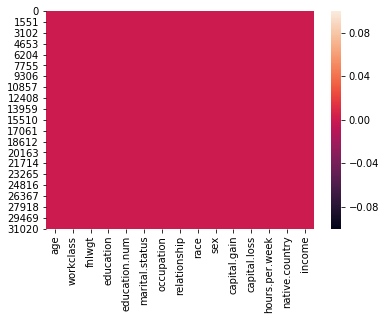

In [48]:
sns.heatmap(df.isnull())
plt.show()

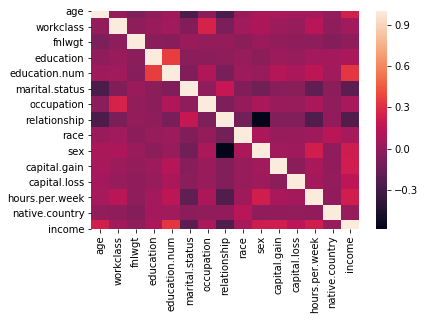

In [49]:
sns.heatmap(dfcor)

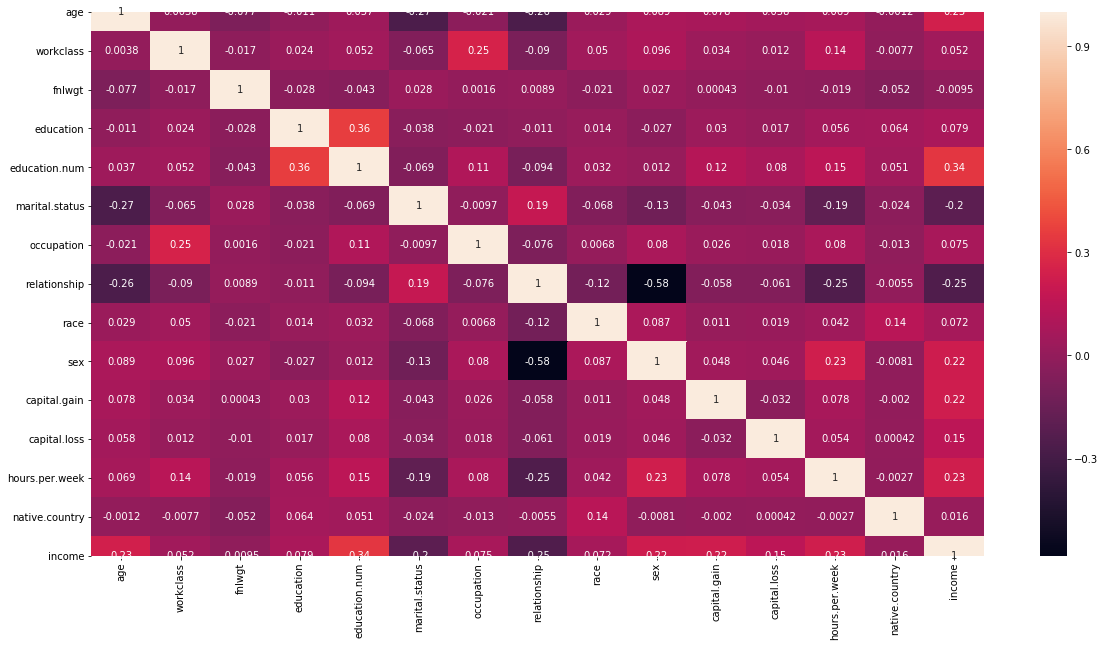

In [50]:
plt.figure(figsize=(20,10))
sns.heatmap(dfcor,color='Red',annot=True)

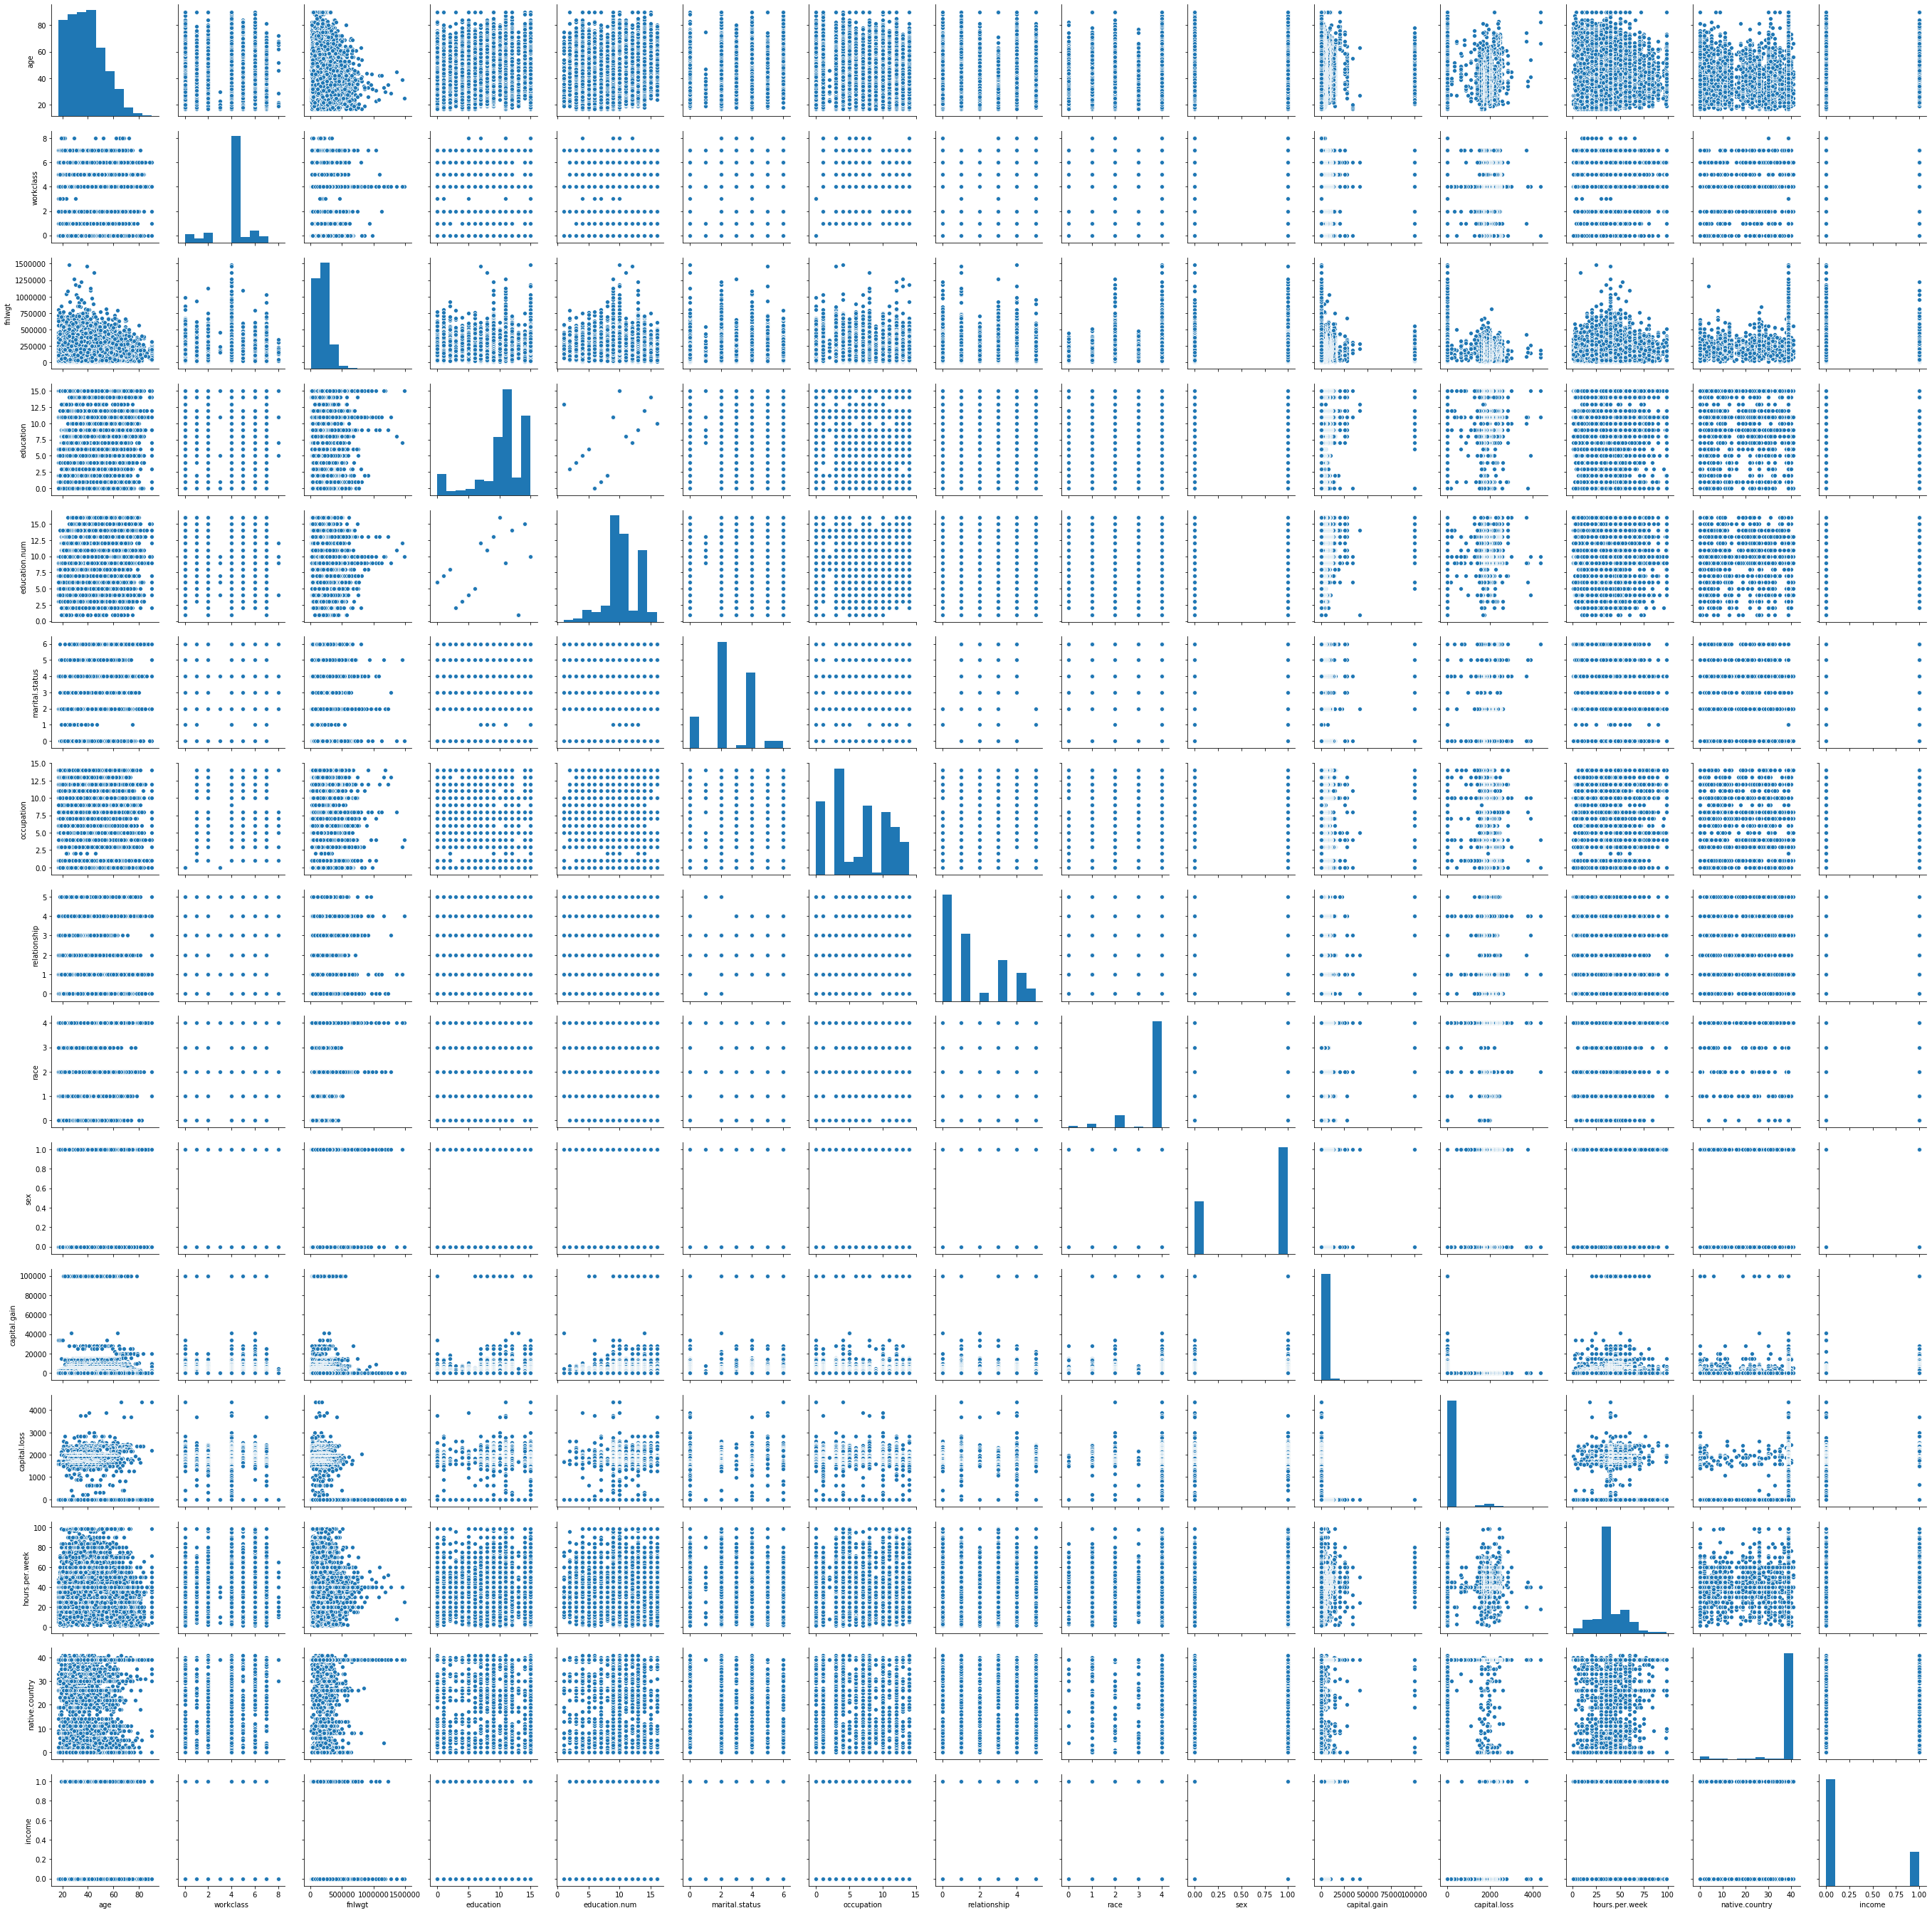

In [51]:
#paiplot representation of the dataset.
sns.pairplot(df)

In [52]:
df = pd.get_dummies(df)
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,0,77053,11,9,6,0,1,4,0,0,4356,40,39,0
1,82,4,132870,11,9,6,4,1,4,0,0,4356,18,39,0
2,66,0,186061,15,10,6,0,4,2,0,0,4356,40,39,0
3,54,4,140359,5,4,0,7,4,4,0,0,3900,40,39,0
4,41,4,264663,15,10,5,10,3,4,0,0,3900,40,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,4,310152,15,10,4,11,1,4,1,0,0,40,39,0
32557,27,4,257302,7,12,2,13,5,4,0,0,0,38,39,0
32558,40,4,154374,11,9,2,7,0,4,1,0,0,40,39,1
32559,58,4,151910,11,9,6,1,4,4,0,0,0,40,39,0


In [53]:
#finding the skewness of the dataset

df.skew()

age                0.558743
workclass         -0.752024
fnlwgt             1.446980
education         -0.934042
education.num     -0.311676
marital.status    -0.013508
occupation         0.114583
relationship       0.786818
race              -2.435386
sex               -0.719293
capital.gain      11.953848
capital.loss       4.594629
hours.per.week     0.227643
native.country    -3.658303
income             1.212430
dtype: float64

In [54]:
##there is some skewness which need to be treated,by seeing we can say only +ve skewness is significant and needs to be treated
#if value is 0.55 or more than that then there would be a skewed value.

#removing the skewness of the dataset using the log

for i in df.columns:
    if df.skew().loc[i]>0.55:
        df[i]=np.log1p(df[i])
    if df.skew().loc[i]<-0.55:
        df[i]=np.square(df[i])
        
df.skew()

age              -0.113341
workclass         1.197477
fnlwgt           -0.671211
education         0.148477
education.num    -0.311676
marital.status   -0.013508
occupation        0.114583
relationship      0.284982
race             -2.120540
sex              -0.719293
capital.gain      3.096144
capital.loss      4.307537
hours.per.week    0.227643
native.country   -3.148914
income            1.212430
dtype: float64

In [55]:
#finding the outliers

from scipy.stats import zscore

z=abs(zscore(df))
print('df.shape:',df.shape)
df1=df.loc[(z<3).all(axis=1)]
print('df1.shape:',df1.shape)
print("z value is:",z)

df.shape: (32561, 15)
df1.shape: (25571, 15)
z value is: [[2.54981087 1.6477754  1.17589939 ... 0.03542945 0.31260873 0.56319851]
 [2.2869191  0.10492184 0.32693201 ... 1.81720429 0.31260873 0.56319851]
 [1.67511281 1.6477754  0.21774839 ... 0.03542945 0.31260873 0.56319851]
 ...
 [0.27201465 0.10492184 0.08616098 ... 0.03542945 0.31260873 1.77557289]
 [1.31183908 0.10492184 0.11213213 ... 0.03542945 0.31260873 0.56319851]
 [1.37951462 0.10492184 0.34886402 ... 1.65522476 0.31260873 0.56319851]]


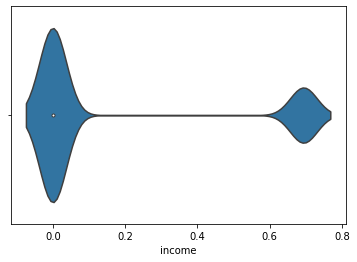

In [56]:
#violin plot representation with respect to each column

sns.violinplot(x="income",data=df)

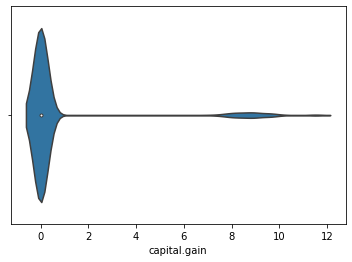

In [57]:
sns.violinplot(x="capital.gain",data=df)

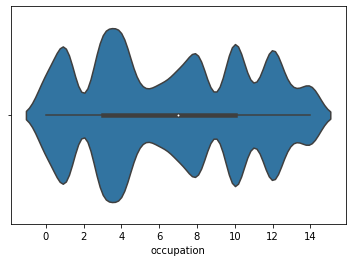

In [58]:
sns.violinplot(x="occupation",data=df)

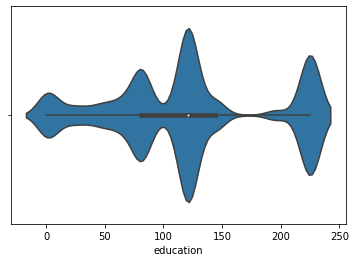

In [59]:
sns.violinplot(x="education",data=df)

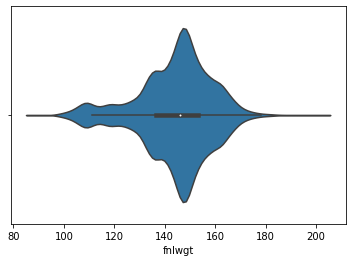

In [60]:
sns.violinplot(x="fnlwgt",data=df)

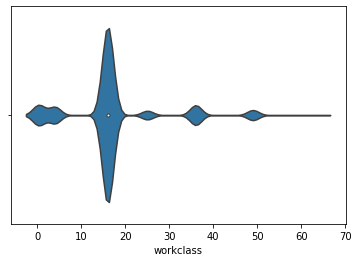

In [61]:
sns.violinplot(x="workclass",data=df)

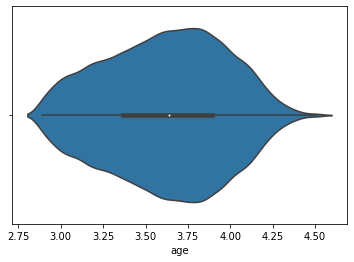

In [62]:
sns.violinplot(x="age",data=df)

In [63]:
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,4.510860,0,126.613395,121,9,6,0,0.693147,16,0,0.0,8.379539,40,1521,0.000000
1,4.418841,16,139.172371,121,9,6,4,0.693147,16,0,0.0,8.379539,18,1521,0.000000
2,4.204693,0,147.229957,225,10,6,0,1.609438,4,0,0.0,8.379539,40,1521,0.000000
3,4.007333,16,140.469094,25,4,0,7,1.609438,16,0,0.0,8.268988,40,1521,0.000000
4,3.737670,16,155.905599,225,10,5,10,1.386294,16,0,0.0,8.268988,40,1521,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,3.135494,16,159.891498,225,10,4,11,0.693147,16,1,0.0,0.000000,40,1521,0.000000
32557,3.332205,16,155.202005,49,12,2,13,1.791759,16,0,0.0,0.000000,38,1521,0.000000
32558,3.713572,16,142.734154,121,9,2,7,0.000000,16,1,0.0,0.000000,40,1521,0.693147
32559,4.077537,16,142.349957,121,9,6,1,1.609438,16,0,0.0,0.000000,40,1521,0.000000


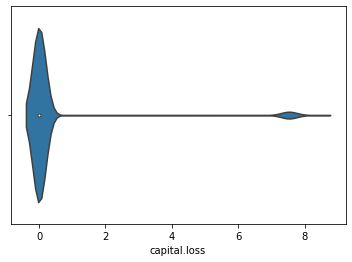

In [64]:
sns.violinplot(x="capital.loss",data=df)

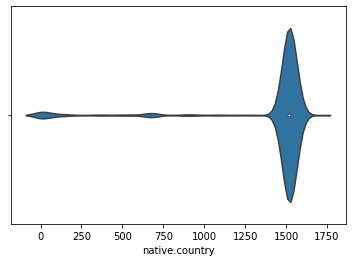

In [65]:
sns.violinplot(x="native.country",data=df)

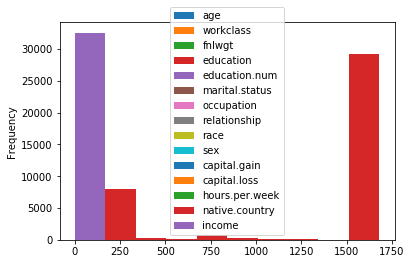

In [66]:
df.plot.hist()

In [67]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

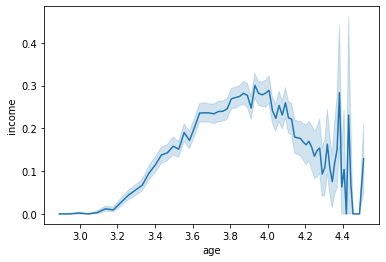

In [68]:
#Lets check the how age is changing with respect to income
sns.lineplot(df["age"],df["income"])
plt.show()

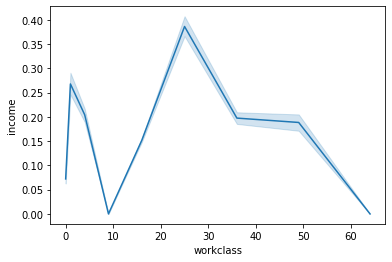

In [69]:
sns.lineplot(df["workclass"],df["income"])
plt.show()

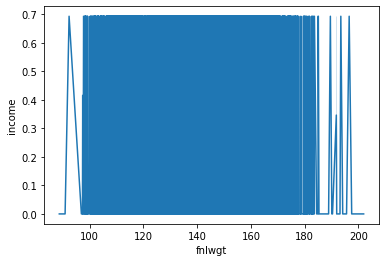

In [70]:
#Lets check the how fnlwgt is changing to income
sns.lineplot(df["fnlwgt"],df["income"])
plt.show()

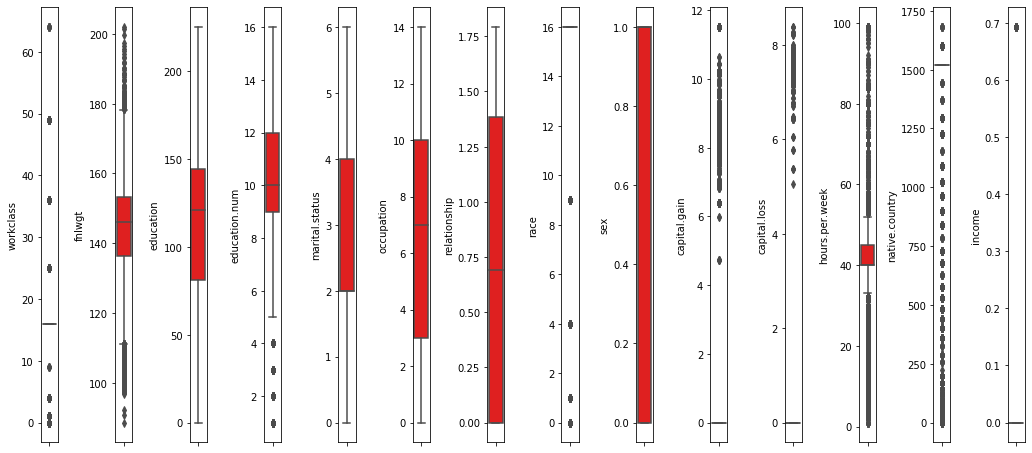

In [71]:
#column Plot
collist = df.columns.values
ncols=15
nrows=12
plt.figure(figsize=(ncols,5*ncols))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncols,i+1)
    sns.boxplot(df[collist[i]],color='red',orient='v')
    plt.tight_layout()

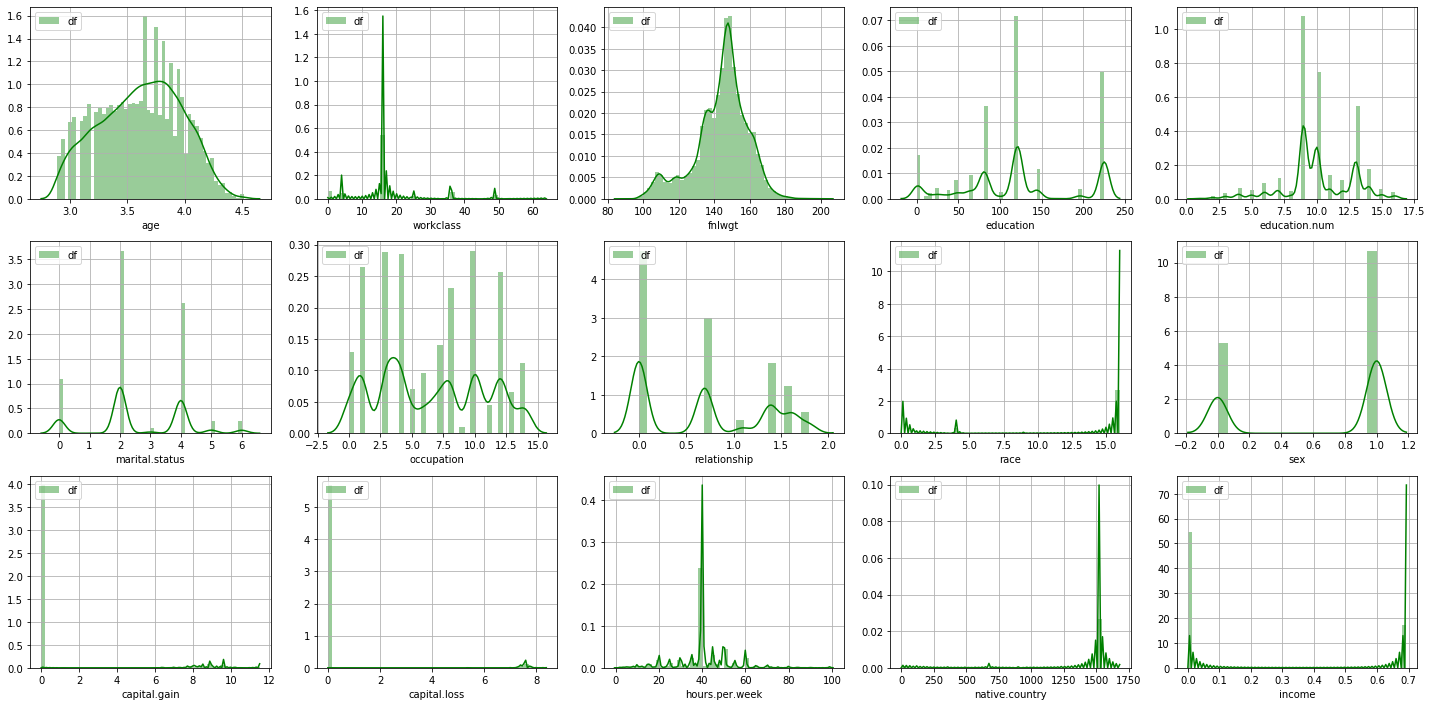

In [72]:
#displot through the iteration
plt.figure(figsize=(20,16))
for i,col in enumerate(list(df.columns.values)):
    plt.subplot(5,5,i+1)
    sns.distplot(df[col],color='g',kde=True,label='df')
    plt.grid()
    plt.legend(loc='upper left')
    plt.tight_layout()

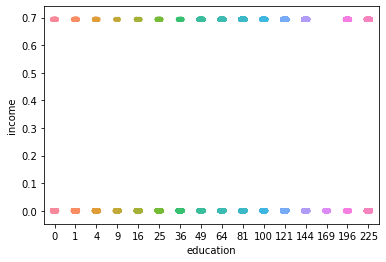

In [73]:
ax=sns.stripplot(x='education',y="income",data=df);

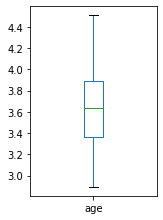

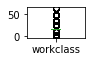

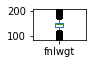

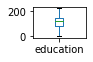

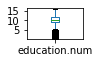

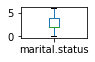

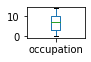

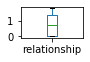

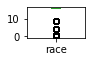

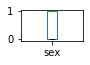

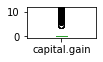

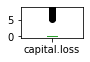

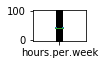

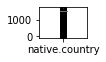

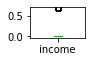

In [74]:
#boxplot

import matplotlib.pyplot as plt
plt.figure(figsize=(10,15))
for i,col in enumerate(list(df.columns.values)):
    plt.subplot(5,5,i+1)
    df.boxplot(col)
    plt.grid()
    plt.tight_layout()
    plt.show()

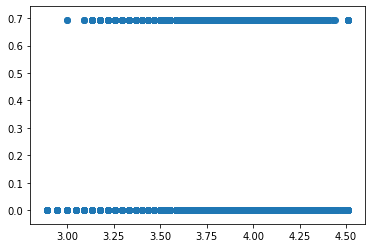

In [75]:
#Scatter plot representation
plt.scatter(df['age'],df['income'])

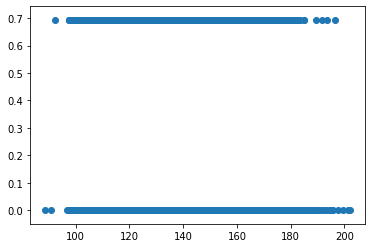

In [76]:
plt.scatter(df['fnlwgt'],df['income'])

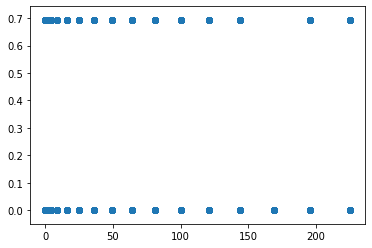

In [77]:
plt.scatter(df['education'],df['income'])

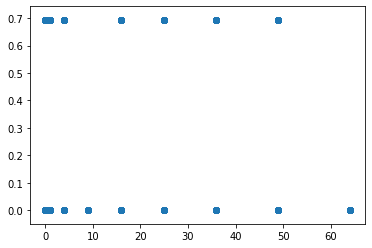

In [78]:
plt.scatter(df['workclass'],df['income'])

In [79]:
#converting float to int format
df['income'].unique()

array([0.        , 0.69314718])

In [80]:
array = df['income']

array.shape

(32561,)

In [81]:
le=LabelEncoder()
i=le.fit_transform(df['income'])
i

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [82]:
df['income']=i
df['income'].unique()

array([0, 1], dtype=int64)

In [83]:
#Separating X and Y Variable to predict the dataset

X = df.drop("income", axis=1)
X

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,4.510860,0,126.613395,121,9,6,0,0.693147,16,0,0.0,8.379539,40,1521
1,4.418841,16,139.172371,121,9,6,4,0.693147,16,0,0.0,8.379539,18,1521
2,4.204693,0,147.229957,225,10,6,0,1.609438,4,0,0.0,8.379539,40,1521
3,4.007333,16,140.469094,25,4,0,7,1.609438,16,0,0.0,8.268988,40,1521
4,3.737670,16,155.905599,225,10,5,10,1.386294,16,0,0.0,8.268988,40,1521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,3.135494,16,159.891498,225,10,4,11,0.693147,16,1,0.0,0.000000,40,1521
32557,3.332205,16,155.202005,49,12,2,13,1.791759,16,0,0.0,0.000000,38,1521
32558,3.713572,16,142.734154,121,9,2,7,0.000000,16,1,0.0,0.000000,40,1521
32559,4.077537,16,142.349957,121,9,6,1,1.609438,16,0,0.0,0.000000,40,1521


In [84]:
Y = df["income"]
Y

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    0
32558    1
32559    0
32560    0
Name: income, Length: 32561, dtype: int64

In [85]:
Y.shape

(32561,)

In [86]:
Y = Y.values.reshape(-1,1)
Y

array([[0],
       [0],
       [0],
       ...,
       [1],
       [0],
       [0]], dtype=int64)

In [87]:
Y.shape

(32561, 1)

In [88]:
#splitting the data into training and testing

train_X,test_X,train_Y,test_Y=train_test_split(X,Y,test_size=.22,random_state=39)

In [89]:
train_X.shape

(25397, 14)

In [90]:
test_X.shape

(7164, 14)

In [91]:
train_Y.shape

(25397, 1)

In [92]:
test_Y.shape

(7164, 1)

In [93]:
#applying the logistic regression
lg=LogisticRegression()
lg.fit(train_X,train_Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [94]:
pred=lg.predict(test_X)
print("pred value is:", pred)

pred value is: [0 0 0 ... 0 0 1]


In [95]:
print("accuracy score:",accuracy_score(pred,test_Y))
print("confusion_matrix: \n",confusion_matrix(test_Y,pred))
print("classification_report:\n",classification_report(test_Y,pred))

accuracy score: 0.8264935790061418
confusion_matrix: 
 [[5119  339]
 [ 904  802]]
classification_report:
               precision    recall  f1-score   support

           0       0.85      0.94      0.89      5458
           1       0.70      0.47      0.56      1706

    accuracy                           0.83      7164
   macro avg       0.78      0.70      0.73      7164
weighted avg       0.81      0.83      0.81      7164



In [96]:
#Using Cross Validation to Check Overfitting,Underfitting and Predict the Result
from sklearn.model_selection import cross_val_score
cvlg1 = cross_val_score(lg,X,Y,cv=10,scoring='accuracy').mean()
print('cvlg1:',cvlg1)

cvlg2 = cross_val_score(lg,X,Y,cv=15,scoring='accuracy').mean()
print('cvlg2:',cvlg2)

cvlg1: 0.7946706262602794
cvlg2: 0.7931586384126468


In [97]:
#Grid Search Cross Validation for Logistic Regression to predict the best
from sklearn.model_selection import GridSearchCV
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
lgcv1=LogisticRegression()
lgcv1_cv=GridSearchCV(lgcv1,grid,cv=10)
lgcv1_cv.fit(train_X,train_Y)

print("tuned hpyerparameters :(best parameters) ",lgcv1_cv.best_params_)
print("accuracy is:",lgcv1_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1000.0, 'penalty': 'l1'}
accuracy is: 0.8244674567862346


In [98]:
lgcv2=LogisticRegression(C=1000.0,penalty="l2")
lgcv2.fit(train_X,train_Y)
print("score is:",lgcv2.score(test_X,test_Y))

score is: 0.821608040201005


In [99]:
#Boost the Dataset by AdaBoost and GradiantBoos
#AdaBoostClassifier

from sklearn.ensemble import AdaBoostClassifier
modelad = AdaBoostClassifier()
modelad.fit(train_X,train_Y)
print(modelad.score(train_X,train_Y))
abpred=modelad.predict(test_X)
print(abpred)
modelad.score(test_X,test_Y)

#GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
modelgb=GradientBoostingClassifier()
modelgb.fit(train_X,train_Y)
print(modelgb.score(train_X,train_Y))
abpred=modelgb.predict(test_X)
print(abpred)
modelgb.score(test_X,test_Y)

0.8596290900500059
[1 0 0 ... 0 0 1]
0.8686065283301178
[1 0 0 ... 0 0 1]


0.8692071468453378

In [100]:
#Boosting though GradientBoost Regressor By using Parameters
from sklearn import ensemble
# Fit regression model
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
modelgbr = ensemble.GradientBoostingRegressor(**params)

modelgbr.fit(train_X, train_Y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.01, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [101]:
from sklearn.metrics import mean_squared_error, r2_score
model_score = modelgbr.score(train_X,train_Y)
print("model_Score:",model_score)

print('R2 sq: ',model_score)
y_predictedgbr = modelgbr.predict(test_X)

# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(test_Y, y_predictedgbr))
# Explained variance score: 1 is perfect prediction
print('Test Variance score: %.2f' % r2_score(test_Y, y_predictedgbr))

model_Score: 0.4921359390086166
R2 sq:  0.4921359390086166
Mean squared error: 0.09
Test Variance score: 0.48


In [102]:
#Prediction Using Naive Bayes Algortm

mb=MultinomialNB()
mb.fit(train_X,train_Y)


predmb = mb.predict(test_X)
print("accuracy score:",accuracy_score(predmb,test_Y))
print("confusion_matrix: \n",confusion_matrix(test_Y,predmb))
print("classification_report:\n",classification_report(test_Y,predmb))

accuracy score: 0.7359017308766053
confusion_matrix: 
 [[4515  943]
 [ 949  757]]
classification_report:
               precision    recall  f1-score   support

           0       0.83      0.83      0.83      5458
           1       0.45      0.44      0.44      1706

    accuracy                           0.74      7164
   macro avg       0.64      0.64      0.64      7164
weighted avg       0.74      0.74      0.74      7164



In [103]:
#Multinomial NB by using Crossval Score
#Cross validation libraries
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
mbn=MultinomialNB()

score=cross_val_score(mbn,X,Y,cv=15)
print('Score:',score)

print('Mean Scores',score.mean())
print('Standard deviation',score.std())

y_pred = cross_val_predict(mbn,X,Y,cv=5)

print('Y Prediction values:',y_pred)
conf_mat = confusion_matrix(Y,y_pred)
conf_mat

Score: [0.24090281 0.85444496 0.88530631 0.89728236 0.83602027 0.71994473
 0.72178719 0.71625979 0.71625979 0.72593275 0.72270843 0.72488479
 0.72258065 0.72304147 0.72580645]
Mean Scores 0.7288775161481363
Standard deviation 0.1457830620675512
Y Prediction values: [1 1 1 ... 0 0 0]


array([[20262,  4458],
       [ 4560,  3281]], dtype=int64)

In [104]:
#using Support Vector Machine
svc = SVC(kernel='rbf')
svc.fit(train_X,train_Y)
svc.score(train_X,train_Y)
predsvc=svc.predict(test_X)
print(accuracy_score(test_Y,predsvc))
print(confusion_matrix(test_Y,predsvc))
print(classification_report(test_Y,predsvc))

0.7848967057509771
[[5245  213]
 [1328  378]]
              precision    recall  f1-score   support

           0       0.80      0.96      0.87      5458
           1       0.64      0.22      0.33      1706

    accuracy                           0.78      7164
   macro avg       0.72      0.59      0.60      7164
weighted avg       0.76      0.78      0.74      7164



In [105]:
#Support Vector Machine by using Crossval Score
sv = SVC()

score=cross_val_score(sv,X,Y,cv=5,scoring='accuracy')
print('accuracy Score=',score)
print('Mean Scores',score.mean())
print('Standard Deviation',score.std())

y_pred = cross_val_predict(sv,X,Y,cv=5)

print('Y Prediction values')
print(y_pred)

conf_mat = confusion_matrix(Y,y_pred)
conf_mat

from sklearn.metrics import accuracy_score
accuracy_score(Y,y_pred)

accuracy Score= [0.72040534 0.7664312  0.77948403 0.78132678 0.7779484 ]
Mean Scores 0.7651191521700504
Standard Deviation 0.02295505528064651
Y Prediction values
[0 0 0 ... 0 0 0]


0.7651177789379933

In [106]:
#Use GridSearchCV for Support Vector Machinee
from sklearn.model_selection import GridSearchCV 
  
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
gridsv = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
gridsv.fit(train_X, train_Y)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.758, total= 2.7min
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.7min remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.758, total= 2.7min
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  5.4min remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.758, total= 2.7min
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.758, total= 1.8min
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.758, total= 2.0min
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.758, total= 1.8min
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.773, total= 1.0min
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.772, total=  52.1s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.774, total=  48.5s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed: 142.6min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [108]:
# print best parameter after tuning 
print(gridsv.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(gridsv.best_estimator_)

{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [109]:
# Re-run predictions and see classification report 

grid_predictions = gridsv.predict(test_X) 
  
# print classification report 
print(classification_report(test_Y, grid_predictions)) 

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      5458
           1       0.70      0.44      0.54      1706

    accuracy                           0.82      7164
   macro avg       0.77      0.69      0.72      7164
weighted avg       0.81      0.82      0.81      7164



In [110]:
#Using DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(train_X,train_Y)
dtc.score(train_X,train_Y)
preddtc=dtc.predict(test_X)
print(accuracy_score(test_Y,preddtc))
print(confusion_matrix(test_Y,preddtc))
print(classification_report(test_Y,preddtc))

0.812534896705751
[[4756  702]
 [ 641 1065]]
              precision    recall  f1-score   support

           0       0.88      0.87      0.88      5458
           1       0.60      0.62      0.61      1706

    accuracy                           0.81      7164
   macro avg       0.74      0.75      0.74      7164
weighted avg       0.81      0.81      0.81      7164



In [111]:
#DecisionTreeClassifier by using Crossval Score
dt=DecisionTreeClassifier(criterion='gini')
score=cross_val_score(dt,X,Y,cv=5,scoring='f1_macro')

print('F1-score:',score)
print('Mean Scores',score.mean())
print('Standard Deviation',score.std())

y_pred = cross_val_predict(dt,X,Y,cv=5)

print('Y Prediction values')
print(y_pred)

conf_mat = confusion_matrix(Y,y_pred)
conf_mat

F1-score: [0.6671375  0.56468616 0.68199904 0.68517502 0.67564173]
Mean Scores 0.65492789099703
Standard Deviation 0.04553996893732425
Y Prediction values
[0 0 1 ... 0 0 0]


array([[20702,  4018],
       [ 3970,  3871]], dtype=int64)

In [112]:
#Using GridSearchCV for DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
dt_grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3)
dt_grid_search_cv.fit(train_X, train_Y)

Fitting 3 folds for each of 294 candidates, totalling 882 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 882 out of 882 | elapsed:  2.0min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=42,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16

In [113]:
# print best parameter after tuning 
print(dt_grid_search_cv.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(dt_grid_search_cv.best_estimator_)

{'max_leaf_nodes': 76, 'min_samples_split': 2}
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=76,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')


In [114]:
#Boost Decision Tree Classifier
from sklearn.ensemble import AdaBoostClassifier

dtbclassifier = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators=200
)
dtbclassifier.fit(train_X, train_Y)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                             

In [115]:
predictions = dtbclassifier.predict(test_X)
predictions

array([1, 0, 0, ..., 0, 0, 1], dtype=int64)

In [116]:
from sklearn.metrics import accuracy_score
print(accuracy_score(test_Y,predictions))

0.870463428252373


In [117]:
confusion_matrix(test_Y, predictions)

array([[5143,  315],
       [ 613, 1093]], dtype=int64)

In [118]:
#Using KNN Nearest Neighbor
knn = KNeighborsClassifier()
knn.fit(train_X,train_Y)
knn.score(train_X,train_Y)
predknn=knn.predict(test_X)
print(accuracy_score(test_Y,predknn))
print(confusion_matrix(test_Y,predknn))
print(classification_report(test_Y,predknn))

0.785036292573981
[[4858  600]
 [ 940  766]]
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      5458
           1       0.56      0.45      0.50      1706

    accuracy                           0.79      7164
   macro avg       0.70      0.67      0.68      7164
weighted avg       0.77      0.79      0.78      7164



In [119]:
#KNN Nearest Neighbor by using Crossval Scores
kn=KNeighborsClassifier()

score=cross_val_score(kn,X,Y,cv=10,scoring='accuracy')

print('Accuracy score:',score)
print('Mean Scores',score.mean())
print('Standard Deviation',score.std())

y_pred = cross_val_predict(kn,X,Y,cv=5)

print('Y Prediction values')
print(y_pred)

print("y_pred.shape",y_pred.shape)

conf_mat = confusion_matrix(Y,y_pred)
conf_mat

Accuracy score: [0.64967762 0.83814496 0.77856265 0.7767199  0.77027027 0.78286241
 0.78624079 0.78040541 0.7779484  0.77272727]
Mean Scores 0.7713559681321425
Standard Deviation 0.044530289325210026
Y Prediction values
[0 0 0 ... 0 0 0]
y_pred.shape (32561,)


array([[22020,  2700],
       [ 4721,  3120]], dtype=int64)

In [120]:
#Use GridSearchCV for KNN Nearest Neighbor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [121]:

# list of integers 1 to 30
# integers we want to try
k_range = range(1, 31)

# list of scores from k_range
k_scores = []


for k in k_range:
    
    knn1 = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn1, train_X, train_Y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

[0.7587917463879458, 0.7841481103653589, 0.7763915530100173, 0.7903697925900133, 0.7875734781982078, 0.7938337861948801, 0.792889136750696, 0.7982044235098634, 0.7956843972622777, 0.7978104746975179, 0.795802569584065, 0.796196099901611, 0.7953693747786799, 0.7961569468599528, 0.7954877950277731, 0.7957633080360706, 0.7960787337402224, 0.7971414779022865, 0.7964328629667566, 0.7967869611322005, 0.7969442399894435, 0.7977316416008609, 0.7979287712026436, 0.7970625827688815, 0.7975351788239404, 0.7961178558306329, 0.7965906688373401, 0.7961573653913666, 0.7956849399404157, 0.7953304076275797]


In [122]:
# define the parameter values that should be searched
# for python 2, k_range = range(1, 31)
knn1 = KNeighborsClassifier(n_neighbors=k)
k_range = list(range(1, 31))
print(k_range)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


In [123]:
# single key-value pair for param_grid
param_grid = dict(n_neighbors=k_range)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}


In [124]:
# instantiate the grid
gridknn = GridSearchCV(knn1, param_grid, cv=10, scoring='accuracy')

In [125]:
# fit the grid with data
gridknn.fit(train_X, train_Y)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=30, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [126]:
# print best parameter after tuning 
print(gridknn.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(gridknn.best_estimator_)

{'n_neighbors': 8}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')


In [127]:
# Re-run predictions and see classification report 

grid_predictions = gridknn.predict(test_X) 
  
# print classification report 
print(classification_report(test_Y, grid_predictions))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87      5458
           1       0.62      0.34      0.44      1706

    accuracy                           0.79      7164
   macro avg       0.72      0.64      0.66      7164
weighted avg       0.77      0.79      0.77      7164



In [128]:
#Using DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(train_X,train_Y)
dtc.score(train_X,train_Y)
preddtc=dtc.predict(test_X)
print(accuracy_score(test_Y,preddtc))
print(confusion_matrix(test_Y,preddtc))
print(classification_report(test_Y,preddtc))

0.8100223338916807
[[4735  723]
 [ 638 1068]]
              precision    recall  f1-score   support

           0       0.88      0.87      0.87      5458
           1       0.60      0.63      0.61      1706

    accuracy                           0.81      7164
   macro avg       0.74      0.75      0.74      7164
weighted avg       0.81      0.81      0.81      7164



In [129]:
#DecisionTreeClassifier by using Crossval Scor
dt=DecisionTreeClassifier(criterion='gini')
score=cross_val_score(dt,X,Y,cv=5,scoring='f1_macro')

print('F1-score:',score)
print('Mean Scores',score.mean())
print('Standard Deviation',score.std())

y_pred = cross_val_predict(dt,X,Y,cv=5)

print('Y Prediction values')
print(y_pred)

conf_mat = confusion_matrix(Y,y_pred)
conf_mat

F1-score: [0.67024759 0.56926177 0.68186756 0.69075895 0.67314139]
Mean Scores 0.6570554534894508
Standard Deviation 0.04447940365707666
Y Prediction values
[0 0 1 ... 0 0 0]


array([[20703,  4017],
       [ 3948,  3893]], dtype=int64)

In [130]:
#Using GridSearchCV for DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
dt_grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3)
dt_grid_search_cv.fit(train_X, train_Y)

Fitting 3 folds for each of 294 candidates, totalling 882 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 882 out of 882 | elapsed:  1.6min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=42,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16

In [131]:
# print best parameter after tuning 
print(dt_grid_search_cv.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(dt_grid_search_cv.best_estimator_)

{'max_leaf_nodes': 76, 'min_samples_split': 2}
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=76,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')


In [132]:
# Re-run predictions and see classification report 

grid_predictions = dt_grid_search_cv.predict(test_X) 
  
# print classification report 
print(classification_report(test_Y, grid_predictions)) 

              precision    recall  f1-score   support

           0       0.89      0.94      0.91      5458
           1       0.75      0.62      0.68      1706

    accuracy                           0.86      7164
   macro avg       0.82      0.78      0.79      7164
weighted avg       0.85      0.86      0.86      7164



In [133]:
#Boost Decision Tree Classifier
from sklearn.ensemble import AdaBoostClassifier

dtbclassifier = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators=200
)
dtbclassifier.fit(train_X, train_Y)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                             

In [134]:
predictions = dtbclassifier.predict(test_X)
predictions

array([1, 0, 0, ..., 0, 0, 1], dtype=int64)

In [136]:
from sklearn.metrics import accuracy_score
print(accuracy_score(test_Y,predictions))
confusion_matrix(test_Y, predictions)
print(classification_report(test_Y, grid_predictions))

0.870463428252373
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      5458
           1       0.75      0.62      0.68      1706

    accuracy                           0.86      7164
   macro avg       0.82      0.78      0.79      7164
weighted avg       0.85      0.86      0.86      7164



In [137]:
#Using KNN Nearest Neighbor
knn = KNeighborsClassifier()
knn.fit(train_X,train_Y)
knn.score(train_X,train_Y)
predknn=knn.predict(test_X)
print(accuracy_score(test_Y,predknn))
print(confusion_matrix(test_Y,predknn))
print(classification_report(test_Y,predknn))


0.785036292573981
[[4858  600]
 [ 940  766]]
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      5458
           1       0.56      0.45      0.50      1706

    accuracy                           0.79      7164
   macro avg       0.70      0.67      0.68      7164
weighted avg       0.77      0.79      0.78      7164



In [138]:
#KNN Nearest Neighbor by using Crossval Scor
kn=KNeighborsClassifier()

score=cross_val_score(kn,X,Y,cv=10,scoring='accuracy')

print('Accuracy score:',score)
print('Mean Scores',score.mean())
print('Standard Deviation',score.std())

y_pred = cross_val_predict(kn,X,Y,cv=5)

print('Y Prediction values')
print(y_pred)

print("y_pred.shape",y_pred.shape)

conf_mat = confusion_matrix(Y,y_pred)
conf_mat

Accuracy score: [0.64967762 0.83814496 0.77856265 0.7767199  0.77027027 0.78286241
 0.78624079 0.78040541 0.7779484  0.77272727]
Mean Scores 0.7713559681321425
Standard Deviation 0.044530289325210026
Y Prediction values
[0 0 0 ... 0 0 0]
y_pred.shape (32561,)


array([[22020,  2700],
       [ 4721,  3120]], dtype=int64)

In [139]:
#Use GridSearchCV for KNN Nearest Neighbor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
# integers we want to try
k_range = range(1, 31)

# list of scores from k_range
k_scores = []


for k in k_range:
    
    knn1 = KNeighborsClassifier(n_neighbors=k)
    
    scores = cross_val_score(knn1, train_X, train_Y, cv=10, scoring='accuracy')
    
    k_scores.append(scores.mean())
print(k_scores)

[0.7587917463879458, 0.7841481103653589, 0.7763915530100173, 0.7903697925900133, 0.7875734781982078, 0.7938337861948801, 0.792889136750696, 0.7982044235098634, 0.7956843972622777, 0.7978104746975179, 0.795802569584065, 0.796196099901611, 0.7953693747786799, 0.7961569468599528, 0.7954877950277731, 0.7957633080360706, 0.7960787337402224, 0.7971414779022865, 0.7964328629667566, 0.7967869611322005, 0.7969442399894435, 0.7977316416008609, 0.7979287712026436, 0.7970625827688815, 0.7975351788239404, 0.7961178558306329, 0.7965906688373401, 0.7961573653913666, 0.7956849399404157, 0.7953304076275797]


In [140]:
knn1 = KNeighborsClassifier(n_neighbors=k)
k_range = list(range(1, 31))
print(k_range)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


In [141]:
# single key-value pair for param_grid
param_grid = dict(n_neighbors=k_range)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}


In [142]:
# instantiate the grid
gridknn = GridSearchCV(knn1, param_grid, cv=10, scoring='accuracy')

In [143]:
# fit the grid with data
gridknn.fit(train_X, train_Y)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=30, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [144]:
# print best parameter after tuning 
print(gridknn.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(gridknn.best_estimator_)

{'n_neighbors': 8}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')


In [145]:
# Re-run predictions and see classification report 

grid_predictions = gridknn.predict(test_X) 
  
# print classification report 
print(classification_report(test_Y, grid_predictions)) 

              precision    recall  f1-score   support

           0       0.82      0.93      0.87      5458
           1       0.62      0.34      0.44      1706

    accuracy                           0.79      7164
   macro avg       0.72      0.64      0.66      7164
weighted avg       0.77      0.79      0.77      7164



In [146]:
#Bagging of KNN Nearest Neighbor
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
baggingknn = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5)

In [147]:
baggingknn.fit(train_X, train_Y)

BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto',
                                                      leaf_size=30,
                                                      metric='minkowski',
                                                      metric_params=None,
                                                      n_jobs=None,
                                                      n_neighbors=5, p=2,
                                                      weights='uniform'),
                  bootstrap=True, bootstrap_features=False, max_features=0.5,
                  max_samples=0.5, n_estimators=10, n_jobs=None,
                  oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

In [148]:
predictions = baggingknn.predict(test_X)
predictions

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [150]:
from sklearn.metrics import accuracy_score
print(accuracy_score(test_Y,predictions))
confusion_matrix(test_Y, predictions)

0.8443606923506422


array([[5234,  224],
       [ 891,  815]], dtype=int64)

In [151]:
#Prediction Using RandomForest Classification
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(train_X,train_Y)
rf.score(train_X,train_Y)
predf=rf.predict(test_X)
print(accuracy_score(test_Y,predf))
print(confusion_matrix(test_Y,predf))
print(classification_report(test_Y,predf))

0.8503629257398102
[[5091  367]
 [ 705 1001]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      5458
           1       0.73      0.59      0.65      1706

    accuracy                           0.85      7164
   macro avg       0.81      0.76      0.78      7164
weighted avg       0.84      0.85      0.84      7164



In [152]:
#RandomForestClassifier Using Cross_Val_Score
rf1=RandomForestClassifier()

score=cross_val_score(rf1,X,Y,cv=10,scoring='accuracy')

print('Accuracy score:',score)
print('Mean Scores',score.mean())
print('Standard Deviation',score.std())

y_pred = cross_val_predict(rf1,X,Y,cv=5)

print('Y Prediction values')
print(y_pred)

print("y_pred.shape",y_pred.shape)

conf_mat = confusion_matrix(Y,y_pred)
conf_mat

Accuracy score: [0.5336199  0.91830467 0.72389435 0.79545455 0.80835381 0.80866093
 0.82002457 0.81971744 0.82493857 0.80927518]
Mean Scores 0.7862243974233535
Standard Deviation 0.09513776014894842
Y Prediction values
[0 0 0 ... 0 0 0]
y_pred.shape (32561,)


array([[22174,  2546],
       [ 4277,  3564]], dtype=int64)

In [153]:
#Using GridSearchCV for Random Forest Classifier
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf2 = RandomForestClassifier()
# Instantiate the grid search model
grid_search_rf2 = GridSearchCV(estimator = rf2, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search_rf2.fit(train_X,train_Y)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 15.3min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed: 34.3min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed: 59.0min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed: 78.0min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [154]:

# print best parameter after tuning 
print(grid_search_rf2.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid_search_rf2.best_estimator_)

{'bootstrap': True, 'max_depth': 90, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 200}
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=90, max_features=3, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [155]:

predictions = (grid_search_rf2.predict(test_X))
  
# print classification report 
print(classification_report(test_Y, predictions))


              precision    recall  f1-score   support

           0       0.89      0.94      0.92      5458
           1       0.77      0.63      0.69      1706

    accuracy                           0.87      7164
   macro avg       0.83      0.79      0.80      7164
weighted avg       0.86      0.87      0.86      7164



In [156]:
#Bagging of Random Forest Classifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
baggingrf = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5)

In [157]:
baggingrf.fit(train_X, train_Y)

BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto',
                                                      leaf_size=30,
                                                      metric='minkowski',
                                                      metric_params=None,
                                                      n_jobs=None,
                                                      n_neighbors=5, p=2,
                                                      weights='uniform'),
                  bootstrap=True, bootstrap_features=False, max_features=0.5,
                  max_samples=0.5, n_estimators=10, n_jobs=None,
                  oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

In [158]:
predictionsrf = baggingrf.predict(test_X)
predictionsrf

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [159]:
from sklearn.metrics import accuracy_score
print(accuracy_score(test_Y,predictionsrf))

0.8390563930764936


In [161]:
print(classification_report(test_Y, predictionsrf))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90      5458
           1       0.76      0.48      0.59      1706

    accuracy                           0.84      7164
   macro avg       0.81      0.71      0.74      7164
weighted avg       0.83      0.84      0.83      7164



In [162]:
#Among all models grid_search_rf2 gives the Highest accuracy(87%) so we are going to save this model

In [163]:
# saving the predection to a csv file.
prediction = pd.DataFrame(predictions, columns=['prediction']).to_csv('Project 11_cencusinc.csv')

In [164]:
#Lets save the above model
from sklearn.externals import joblib

#Save the model as pickle in a file
joblib.dump(grid_search_rf2,'11CensusIncome.pkl')

['11CensusIncome.pkl']